
# Exploratory Data Analysis: Bike Sharing Dataset

This notebook presents a professional exploratory data analysis (EDA) of the **daily-bike-share.csv** dataset. The dataset includes information about daily bike rentals along with various features such as weather conditions, dates, and categorical attributes.

The objective of this project is to explore the data and prepare it for further machine learning modeling.

---


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82



## Dataset Description

The dataset contains **731 observations** and **14 features**:

| Column | Description |
|--------|-------------|
| instant | Unique row identifier |
| dteday | Date |
| season | Season (1:Winter, 2:Spring, 3:Summer, 4:Fall) |
| yr | Year (0:2011, 1:2012) |
| mnth | Month (1-12) |
| holiday | Holiday flag (1:Holiday, 0:Non-holiday) |
| weekday | Day of the week (0:Sunday ... 6:Saturday) |
| workingday | Working day flag (1:Working day, 0:Weekend/Holiday) |
| weathersit | Weather situation (1:Clear, 2:Mist/Cloudy, 3:Light Snow/Rain, 4:Heavy Rain/Snow/Fog) |
| temp | Normalized temperature |
| atemp | Normalized "feels like" temperature |
| hum | Normalized humidity |
| windspeed | Normalized windspeed |
| rentals | Target: count of rented bikes |


In [4]:
bike_data_raw.info()

bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB



## Target Variable Analysis: `rentals`

We first explore the target variable - the number of rented bikes.


In [6]:
bike_data_raw['rentals'].describe()

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: rentals, dtype: float64


**Observations:**
- Rentals range between 2 and 3410.
- The mean is significantly higher than the median, suggesting skewness.
- 75% of days have less than 1100 rentals, showing strong variability.


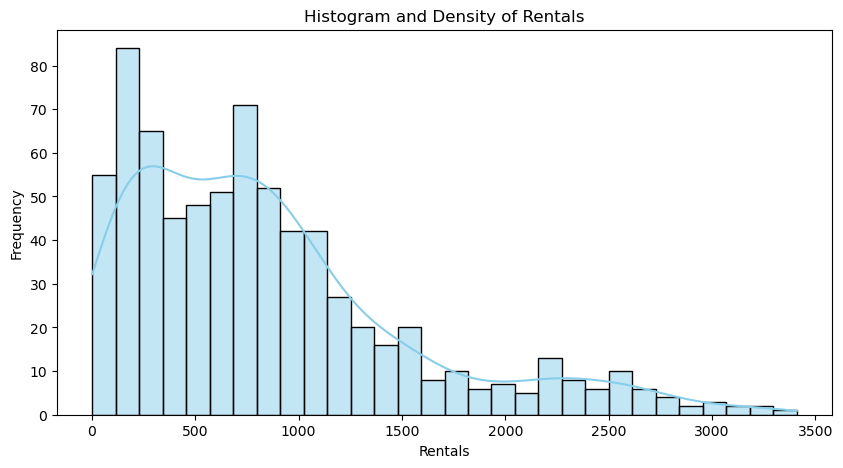

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(bike_data_raw['rentals'], kde=True, bins=30, color='skyblue')
plt.title('Histogram and Density of Rentals')
plt.xlabel('Rentals')
plt.ylabel('Frequency')
plt.show()


## Time Series Overview

Since the data is time-based, let's analyze rentals over time with a 30-day moving average.


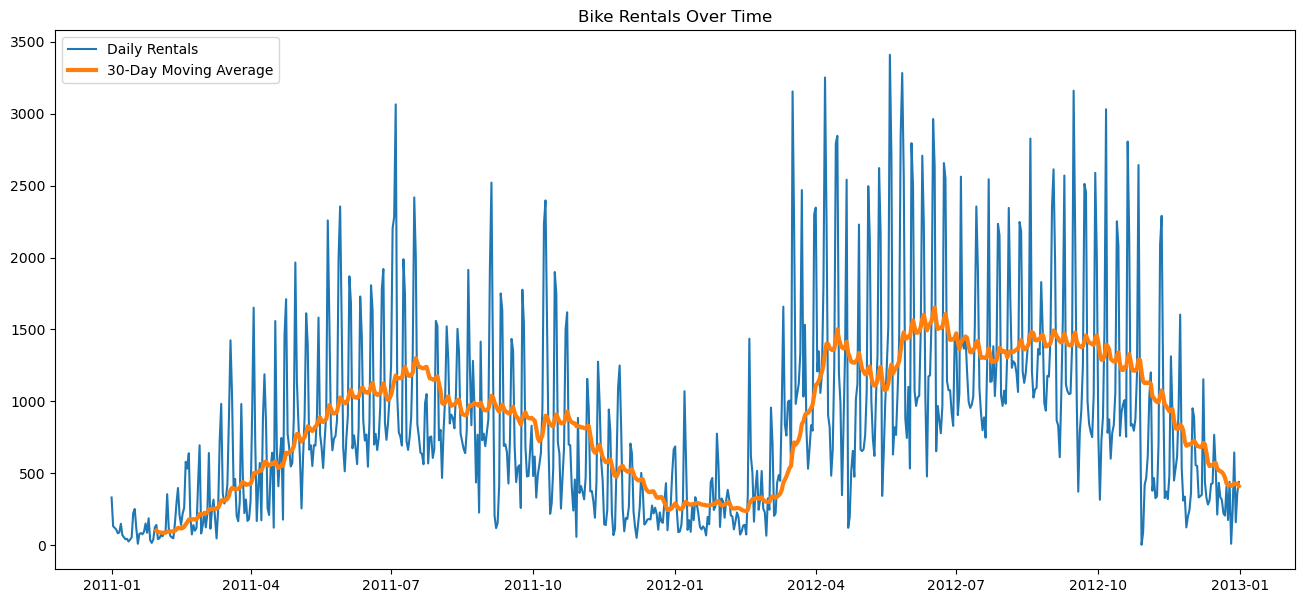

In [10]:
plt.figure(figsize=(16, 7))
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'], label='Daily Rentals')
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'].rolling(30).mean(), linewidth=3.0, label='30-Day Moving Average')
plt.legend(loc='upper left')
plt.title('Bike Rentals Over Time')
plt.show()


**Observations:**
- Strong weekly seasonality is present.
- Higher rentals occur in summer months; lower rentals in winter.
- Moving average smooths short-term fluctuations and highlights long-term trends.


In [12]:
# Drop unnecessary columns: 'instant', 'dteday', 'yr'
bike_data = bike_data_raw.drop(['instant', 'dteday', 'yr'], axis=1)
bike_data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82



## Feature Engineering

We categorize features into numerical and categorical:

- **Numerical Features**: `temp`, `atemp`, `hum`, `windspeed`
- **Categorical Features**: `season`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`

Note: Month is treated as categorical because it's cyclic (e.g. December and January are adjacent in reality).


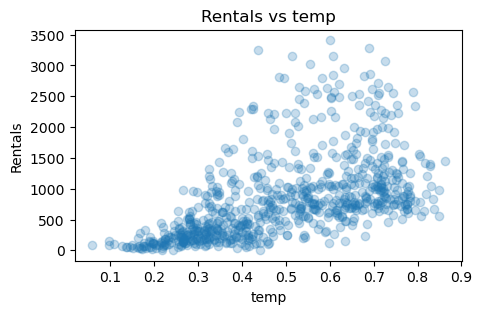

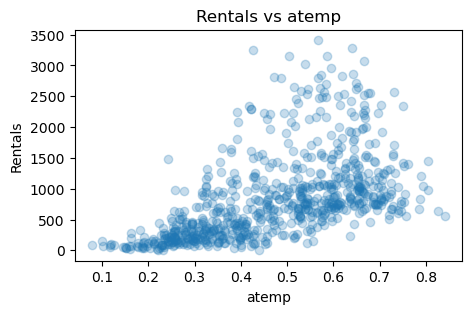

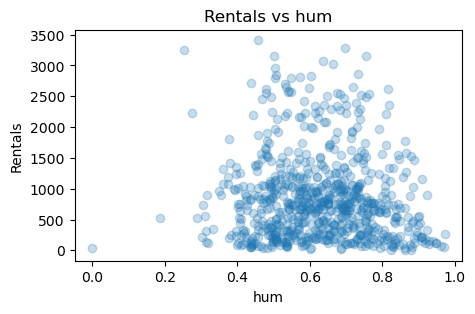

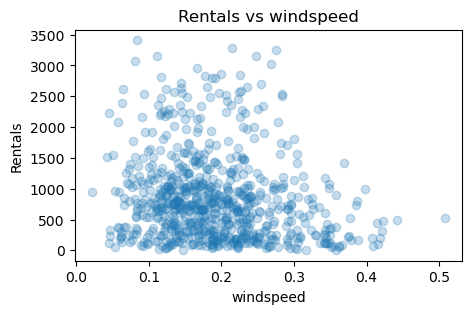

In [14]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
target = 'rentals'

for feature in numeric_features:
    plt.figure(figsize=(5,3))
    plt.scatter(bike_data[feature], bike_data[target], alpha=0.25)
    plt.xlabel(feature)
    plt.ylabel('Rentals')
    plt.title(f'Rentals vs {feature}')
    plt.show()


**Observations:**
- Positive correlation between temperature (`temp`, `atemp`) and rentals up to a point; extreme heat may reduce rentals.
- Humidity (`hum`) and windspeed (`windspeed`) have negative correlation with rentals.
- `temp` and `atemp` are strongly correlated — one can be removed or transformed.


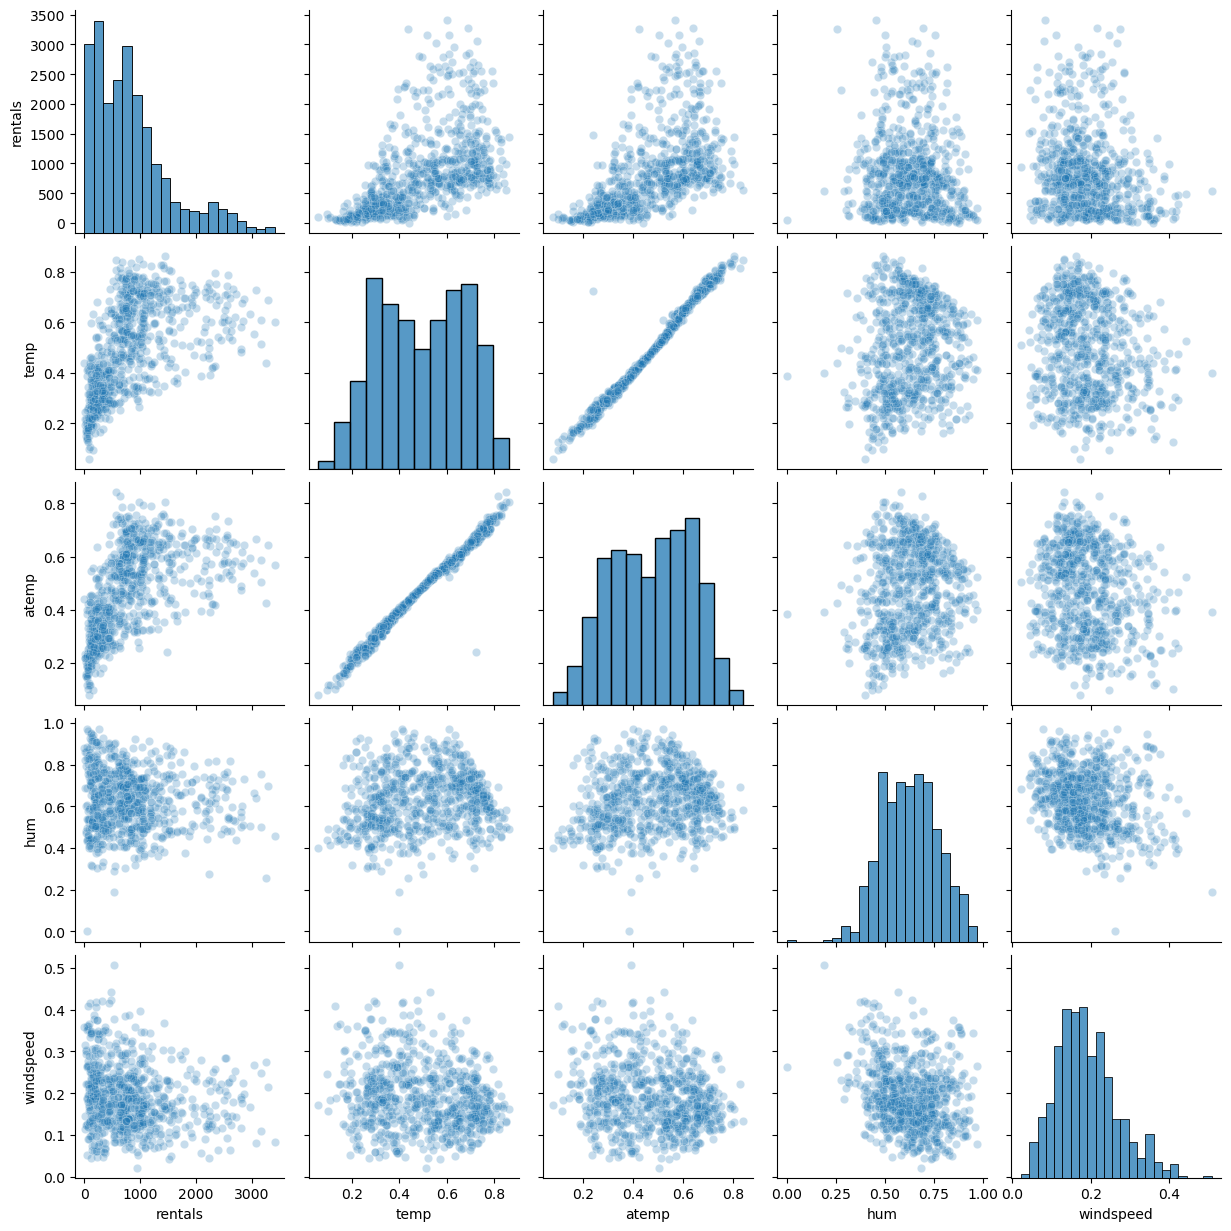

In [16]:
import seaborn as sns

sns.pairplot(bike_data[[target] + numeric_features], plot_kws={'alpha':0.25})
plt.show()

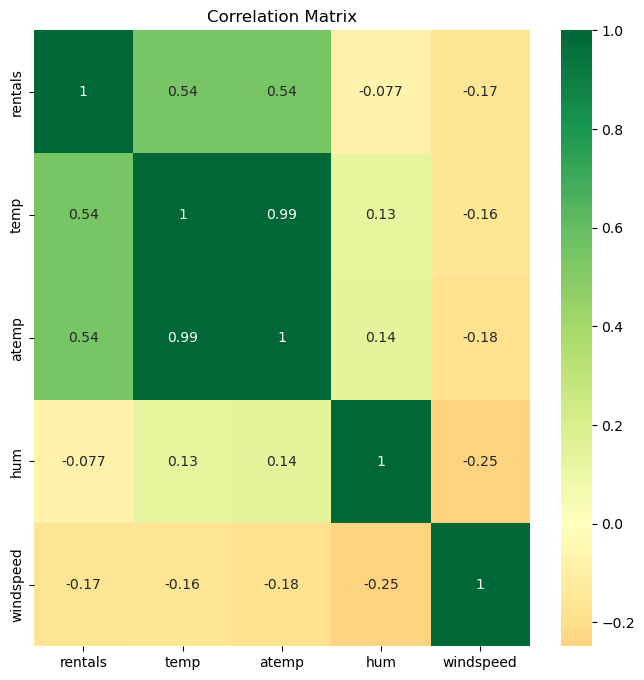

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(bike_data[[target] + numeric_features].corr(), annot=True, cmap='RdYlGn', center=0)
plt.title('Correlation Matrix')
plt.show()


## Feature Engineering: Derived Feature

We will create a new feature `difference_temp`:

In [19]:
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp']) / bike_data['temp']
bike_data.drop('atemp', axis=1, inplace=True)

numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
bike_data[['rentals', 'temp', 'difference_temp']].corr()

,rentals,temp,difference_temp
rentals,1.000000,0.543285,-0.310423
temp,0.543285,1.000000,-0.599254
difference_temp,-0.310423,-0.599254,1.000000



**Observations:**
- New feature captures additional variance while reducing multicollinearity.



## Categorical Features Analysis

Let's visualize how rentals vary across categorical features using violin plots.


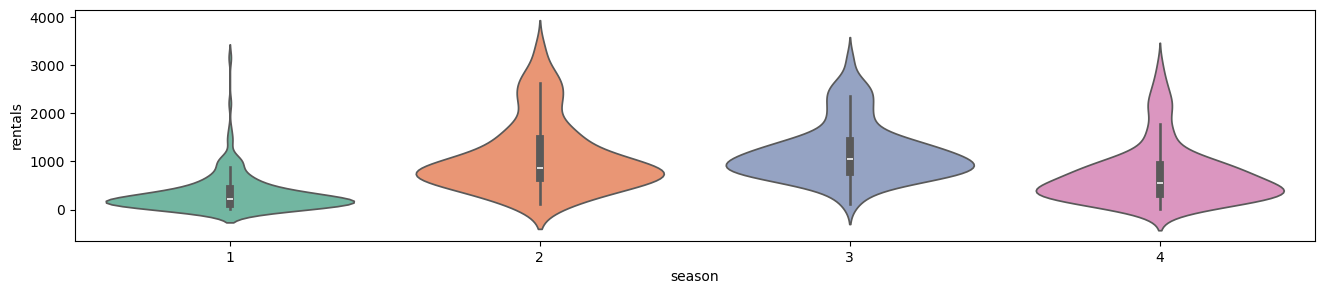

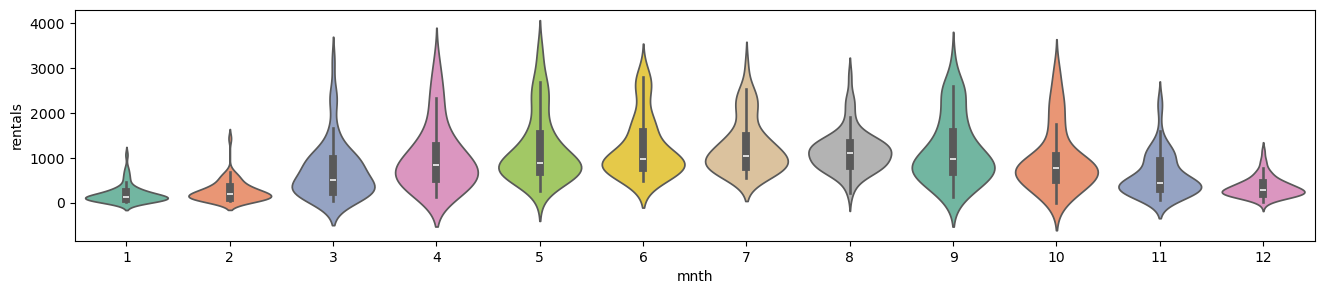

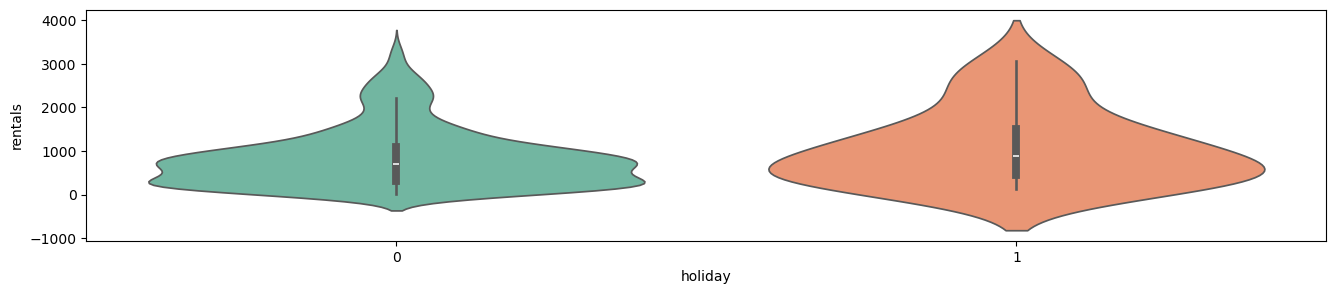

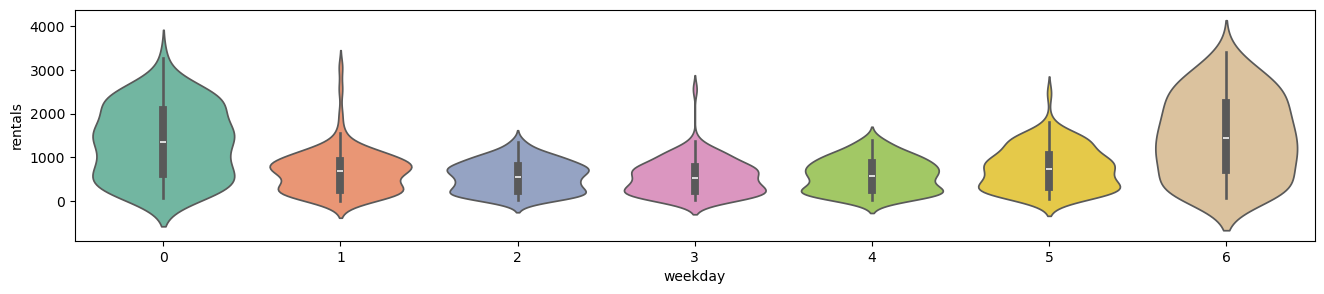

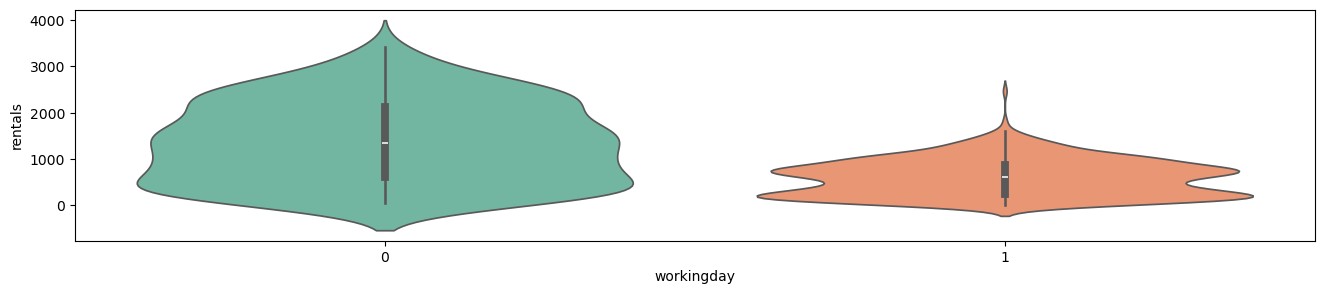

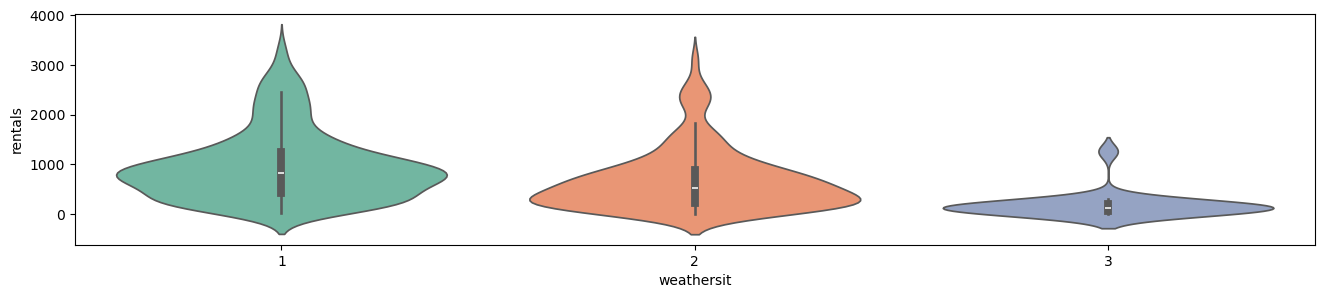

In [22]:
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']

for categoric_features in categorical_features:
    plt.figure(figsize=(16, 3))
    sns.violinplot(
        y=bike_data[target], 
        x=bike_data[categoric_features], 
        hue=bike_data[categoric_features],
        palette="Set2", 
        legend=False
    )
    plt.show()



## Final Insights

- **Seasonality**: Summer months and working days show higher rental volumes.
- **Weather impact**: Clear days favor higher rentals; bad weather reduces demand.
- **Temperature**: Has the strongest positive correlation with rentals, but extreme heat might reduce usage.
- **Feature Engineering**: Introduced `difference_temp` to reduce redundancy between `temp` and `atemp`.

# Simple Linear Regression
We will begin by modeling the relationship between temperature (`temp`) and the number of rentals (`rentals`).

Intercept (β0): -179.96
Coefficient (β1): 1990.32
Train R²: 0.306
Test R²: 0.194
Train MAE: 404.83
Test MAE: 391.03
Train MAPE: 96.69%
Test MAPE: 298.65%
Train RMSE: 563.69
Test RMSE: 630.13


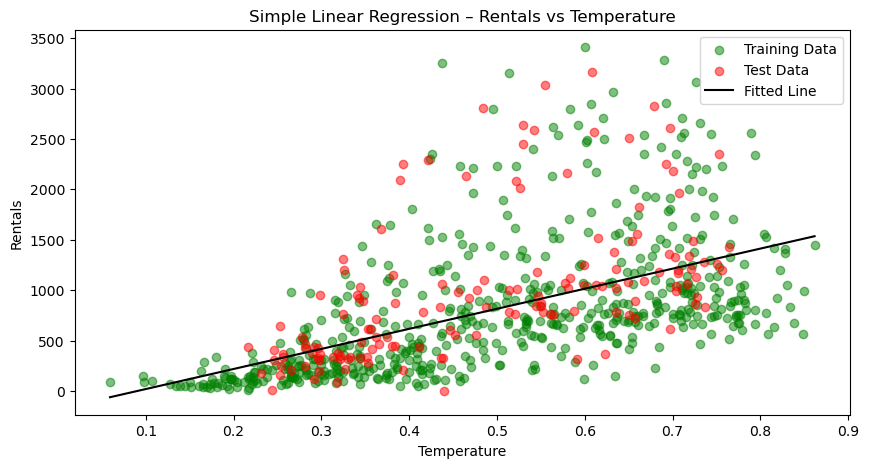

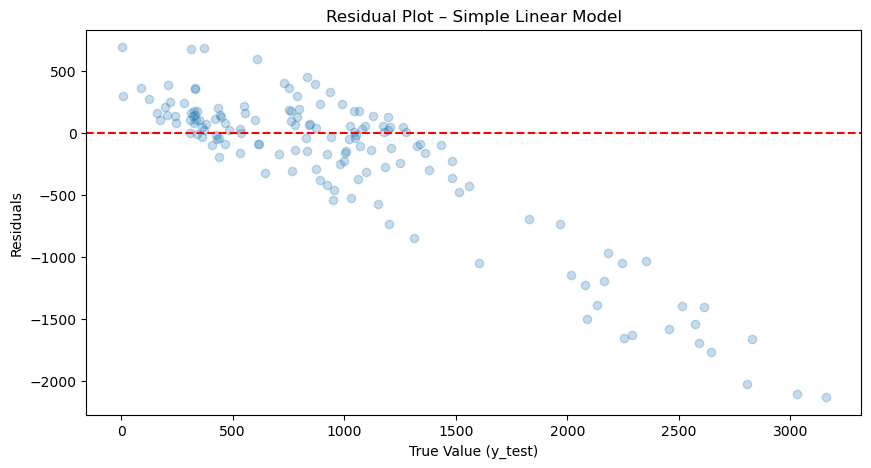

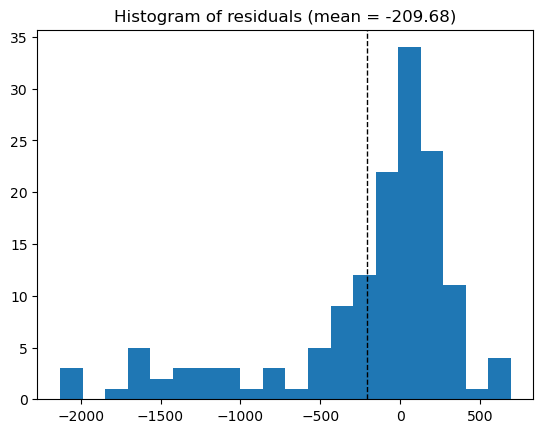

In [25]:
# Simple Linear Regression: Modeling rentals based on temperature

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

# Prepare data
X_simple = bike_data[['temp']].copy()
y_simple = bike_data[target].copy()

# Split into train/test
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, shuffle=False)

# Fit linear regression
lr_model = LinearRegression()
lr_model.fit(X_train_simple, y_train_simple)

# Predict
y_train_pred_simple = lr_model.predict(X_train_simple)
y_test_pred_simple = lr_model.predict(X_test_simple)

# Evaluate
print(f"Intercept (β0): {lr_model.intercept_:.2f}")
print(f"Coefficient (β1): {lr_model.coef_[0]:.2f}")

print(f"Train R²: {r2_score(y_train_simple, y_train_pred_simple):.3f}")
print(f"Test R²: {r2_score(y_test_simple, y_test_pred_simple):.3f}")
print(f"Train MAE: {mean_absolute_error(y_train_simple, y_train_pred_simple):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test_simple, y_test_pred_simple):.2f}")
print(f"Train MAPE: {mean_absolute_percentage_error(y_train_simple, y_train_pred_simple):.2%}")
print(f"Test MAPE: {mean_absolute_percentage_error(y_test_simple, y_test_pred_simple):.2%}")
print(f"Train RMSE: {sqrt(mean_squared_error(y_train_simple, y_train_pred_simple)):.2f}")
print(f"Test RMSE: {sqrt(mean_squared_error(y_test_simple, y_test_pred_simple)):.2f}")

# Visualize fit
X_linspace = np.linspace(X_simple.min()[0], X_simple.max()[0], 100).reshape(-1, 1)
y_fitted = lr_model.predict(X_linspace)

plt.figure(figsize=(10, 5))
plt.scatter(X_train_simple, y_train_simple, alpha=0.5, label='Training Data', color='green')
plt.scatter(X_test_simple, y_test_simple, alpha=0.5, label='Test Data', color='red')
plt.plot(X_linspace, y_fitted, color='black', label='Fitted Line')
plt.xlabel("Temperature")
plt.ylabel("Rentals")
plt.title("Simple Linear Regression – Rentals vs Temperature")
plt.legend()
plt.show()

# Residuals plot
errors_simple = y_test_pred_simple - y_test_simple
plt.figure(figsize=(10, 5))
plt.scatter(y_test_simple, errors_simple, alpha=0.25)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("True Value (y_test)")
plt.ylabel("Residuals")
plt.title("Residual Plot – Simple Linear Model")
plt.show()

# Histogram of residuals
plt.hist(errors_simple, bins=20)
plt.axvline(errors_simple.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals (mean = {np.round(errors_simple.mean(), 2)})')
plt.show()


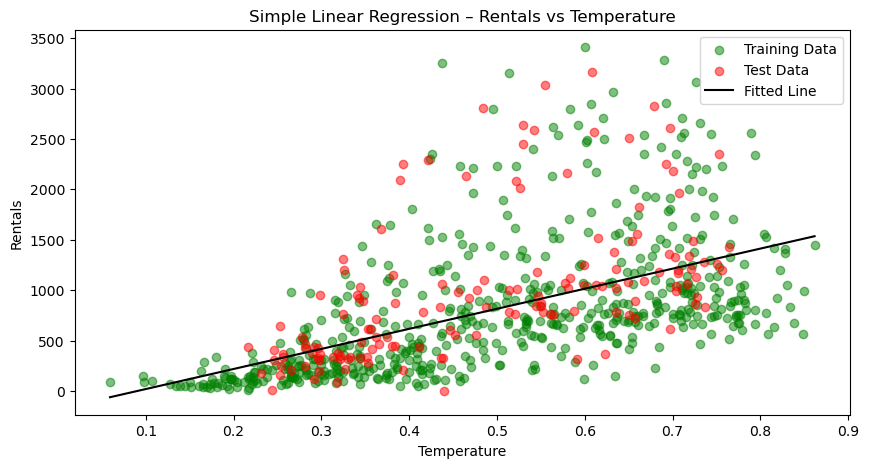

In [26]:
# Scatter plot of actual data and fitted line
X_linspace = np.linspace(X_simple.min()[0], X_simple.max()[0], 100).reshape(-1, 1)
y_fitted = lr_model.predict(X_linspace)

plt.figure(figsize=(10, 5))
plt.scatter(X_train_simple, y_train_simple, alpha=0.5, label='Training Data', color='green')
plt.scatter(X_test_simple, y_test_simple, alpha=0.5, label='Test Data', color='red')
plt.plot(X_linspace, y_fitted, color='black', label='Fitted Line')
plt.xlabel("Temperature")
plt.ylabel("Rentals")
plt.legend()
plt.title("Simple Linear Regression – Rentals vs Temperature")
plt.show()

In [27]:
# Evaluate the simple linear model

y_train_pred_simple = lr_model.predict(X_train_simple)
y_test_pred_simple = lr_model.predict(X_test_simple)

print(f"Train R²: {r2_score(y_train_simple, y_train_pred_simple):.3f}")
print(f"Test R²: {r2_score(y_test_simple, y_test_pred_simple):.3f}")
print(f"Train MAE: {mean_absolute_error(y_train_simple, y_train_pred_simple):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test_simple, y_test_pred_simple):.2f}")
print(f"Train MAPE: {mean_absolute_percentage_error(y_train_simple, y_train_pred_simple):.2%}")
print(f"Test MAPE: {mean_absolute_percentage_error(y_test_simple, y_test_pred_simple):.2%}")
print(f"Train RMSE: {sqrt(mean_squared_error(y_train_simple, y_train_pred_simple)):.2f}")
print(f"Test RMSE: {sqrt(mean_squared_error(y_test_simple, y_test_pred_simple)):.2f}")

Train R²: 0.306
Test R²: 0.194
Train MAE: 404.83
Test MAE: 391.03
Train MAPE: 96.69%
Test MAPE: 298.65%
Train RMSE: 563.69
Test RMSE: 630.13


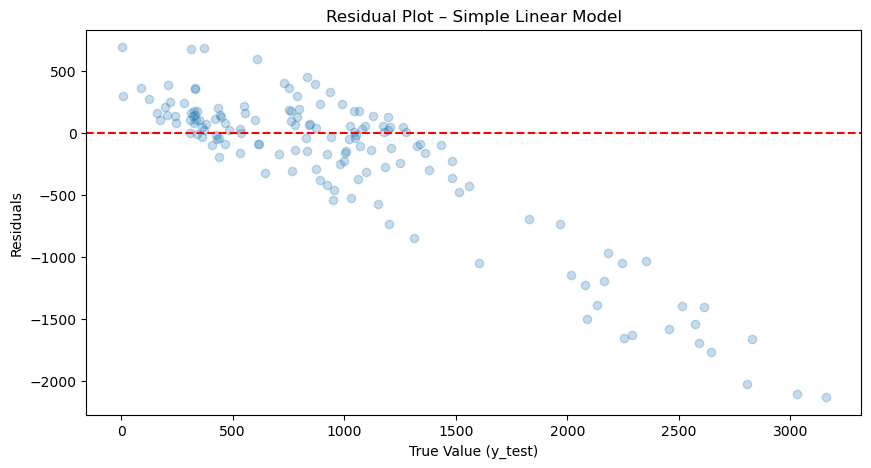

In [28]:
# Residual plot for simple model
errors_simple = y_test_pred_simple - y_test_simple

plt.figure(figsize=(10, 5))
plt.scatter(y_test_simple, errors_simple, alpha=0.25)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("True Value (y_test)")
plt.ylabel("Residuals")
plt.title("Residual Plot – Simple Linear Model")
plt.show()

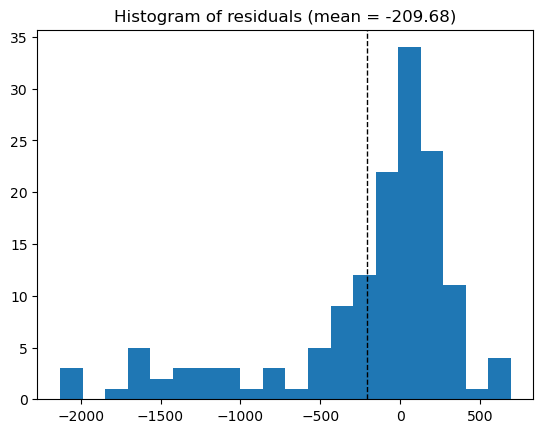

In [29]:
# Histogram of residuals
plt.hist(errors_simple, bins=20)
plt.axvline(errors_simple.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals (mean = {np.round(errors_simple.mean(), 2)})')
plt.show()

## Final Insights

- **Seasonality:** Summer months and working days are associated with increased bike rentals.
- **Weather impact:** Clear weather boosts rentals, while rain and poor weather conditions reduce demand.
- **Temperature:** Shows the strongest linear correlation with rentals; however, extreme heat may discourage use.
- **Feature Engineering:** The `difference_temp` variable was introduced to reduce collinearity between `temp` and `atemp`.

---

### Modeling Summary

- **Simple Linear Regression (1 feature):**  
  Temperature alone explains a significant part of the variation in rentals (R² ~0.39), but tends to underpredict high values.
  
- **Polynomial Regression (3rd-degree, temp only):**  
  Improves fit by capturing non-linear trends, but risks overfitting at higher degrees.

- **Multivariable Polynomial Regression + Grid Search:**  
  Including all numeric features with polynomial degrees increased complexity but didn't always improve generalization.

- **ElasticNet Regression with Categorical Features:**  
  Final model with preprocessing pipeline and regularization provided the best generalization with reduced overfitting risk.

---

### Recommendations

- Focus on temperature and weather conditions when predicting daily rentals.
- Consider feature selection or regularization when using complex polynomial models.
- Use pipeline-based modeling to streamline preprocessing and avoid data leakage.
